# Análisis Exploratorio Project covid 19

Este projecto busca analizar los efectos de la pandemia del covid 19 sobre **10,000** sujetos de diferentes industrias. Como punto de partida, se tiene un dataset de **10,000** registros donde se toman datos relevantes como: Horas trabajadas por día, reuniones por día, niveles de estrés, afectado por el covid, nivel de productividad, entre otros. Estos datos pueden dar indicios sobre comó la pandemia pudo haber afectado los niveles de productividad en diferentes industrías.

A partir de estos y otros atributos del dataset, es posible aplicar algunos modelos de regresión para poder intentar predecir niveles de productividad, el cual es bastante interesante y relevante, para poder tomar información y decisiones ante un posible evento futuro de las mismas magnitudes. Aclaramos que este proyecto solo se enfoca en el análisis exploratorio.

### Objetivos

Al finalizar este laboratorio se podrá:

* Cargar el conjunto de datos en un dataframe usando la librería *pandas* de python.
* Mirar el tamaño y la forma del dataframe.
* Observar los tipos de datos y atributos que se albergan en cada columna del dataset.
* Realizar Analisis Exploratorio de Datos del dataframe.


El archivo se descargará desde **www.kaggle.com** por lo cual se instalará el paquete correspondiente.

In [14]:
!pip install kagglehub


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### Importar paquetes y librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot') # optional: for ggplot-like style

### Cargar el archivo .csv del dataset, en un dataframe usando *pandas*

In [ ]:
# Descargar el dataset
path = kagglehub.dataset_download("gcreatives/impact-of-covid-19-on-working-professionals")
file_name = 'synthetic_covid_impact_on_work.csv'

# Leer el archivo CSV usando pandas
csv_file_path = f"{path}/{file_name}"
df_covid = pd.read_csv(csv_file_path)
df_covid

,Increased_Work_Hours,Work_From_Home,Hours_Worked_Per_Day,Meetings_Per_Day,Productivity_Change,Stress_Level,Health_Issue,Job_Security,Childcare_Responsibilities,Commuting_Changes,Technology_Adaptation,Salary_Changes,Team_Collaboration_Challenges,Sector,Affected_by_Covid
0,1,1,6.392394,2.684594,1,Low,0,0,1,1,1,0,1,Retail,1
1,1,1,9.171984,3.339225,1,Low,0,1,0,1,1,0,1,IT,1
2,1,0,10.612561,2.218333,0,Medium,0,0,0,0,0,0,0,Retail,1
3,1,1,5.546169,5.150566,0,Medium,0,0,0,1,0,0,0,Education,1
4,0,1,11.424615,3.121126,1,Medium,0,1,1,1,0,1,1,Education,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1,7.961822,2.283857,1,Medium,1,1,1,0,0,0,1,IT,1
9996,0,0,10.917086,3.621406,0,Medium,0,0,1,0,1,0,0,IT,1
9997,1,1,10.176211,1.039689,1,Low,0,1,0,1,1,1,1,Retail,1
9998,1,1,11.903973,3.756725,0,Medium,1,1,0,1,1,1,1,Education,1


### Tamaño y forma del dataframe

In [3]:
print('La cantidad de filas del dataframe es:', df_covid.shape[0])
print('La cantidad de columnas del dataframe es:', df_covid.shape[1])

La cantidad de filas del dataframe es: 10000
La cantidad de columnas del dataframe es: 15


### Identificar si hay *handle missing values*

In [4]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Increased_Work_Hours           10000 non-null  int64  
 1   Work_From_Home                 10000 non-null  int64  
 2   Hours_Worked_Per_Day           10000 non-null  float64
 3   Meetings_Per_Day               10000 non-null  float64
 4   Productivity_Change            10000 non-null  int64  
 5   Stress_Level                   10000 non-null  object 
 6   Health_Issue                   10000 non-null  int64  
 7   Job_Security                   10000 non-null  int64  
 8   Childcare_Responsibilities     10000 non-null  int64  
 9   Commuting_Changes              10000 non-null  int64  
 10  Technology_Adaptation          10000 non-null  int64  
 11  Salary_Changes                 10000 non-null  int64  
 12  Team_Collaboration_Challenges  10000 non-null  

Observamos que no existen dartos faltantes en el dataframe. Se observa también en la columna Dtype que los tipos de datos son coherentes y no es necesario realizar algún tipo de cambio.

### Tipos de sectores y cantidad

El dataframe tiene un atributo llamado **Sector**, que nos indica que tipos de industrias hay en las muestras. Utilizaremos el método *pd.value_counts()* para mostrar los tipos de industrias y su respectiva cantidad.

In [5]:
sectors = df_covid['Sector'].value_counts()
sectors

Sector
IT            2546
Healthcare    2498
Education     2484
Retail        2472
Name: count, dtype: int64

Utilizaremos una gráfica de barras para mirar el resultado anterior

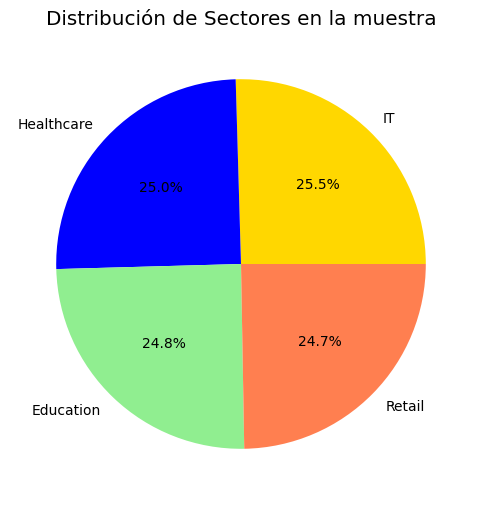

In [6]:
# Creamos unafigura y definimos su tamaño
plt.figure(figsize = (12, 6))

# Utilizamos la librería matplotlib
plt.pie(sectors.values, 
        labels = sectors.index, 
        autopct='%1.1f%%',
        colors = ['gold','blue','lightgreen','coral'])
plt.title('Distribución de Sectores en la muestra')
plt.show()

Ahora revisaremos que sector en promedio trabajó mas horas por día. Primero, agruparemos los registros por sector y calcularemos el promedio de horas trabajadas. Segundo, pasaremos esa información para graficar.

In [7]:
df_grouped = df_covid.groupby('Sector')[['Hours_Worked_Per_Day', 'Meetings_Per_Day']].mean()
df_grouped

,Hours_Worked_Per_Day,Meetings_Per_Day
Sector,,
Education,8.024151,3.999040
Healthcare,7.991978,3.982732
IT,8.019205,3.942276
Retail,7.990505,3.983679


<details><summary>Conclusión</summary>

<p>
De la información en la tabla anterior se infiere:
<br>El promedio de horas trabajadas por día en todas las industrias es aproximadamente 8 h.
<br>El promedio de reuniones diarias en cada industría es de 4 aproximadamente.
<br>Se observa ligeramente que la industría que mas reuniones tuvo fue la de Educación. Este valor es lógico y sensato, puesto que en tiempos de pandemia, las apps de reuniones eran las herramientas indispensables para realizar el trabajo.

</p>
</details>

### Distribución de horas trabajadas

Un atributo valioso que nos puede dar información relevante sobre cómo se distributen las horas trabajadas es: 'Hours_Worked_Per_Day'. Aplicaremos un histograma para comprender mejor.

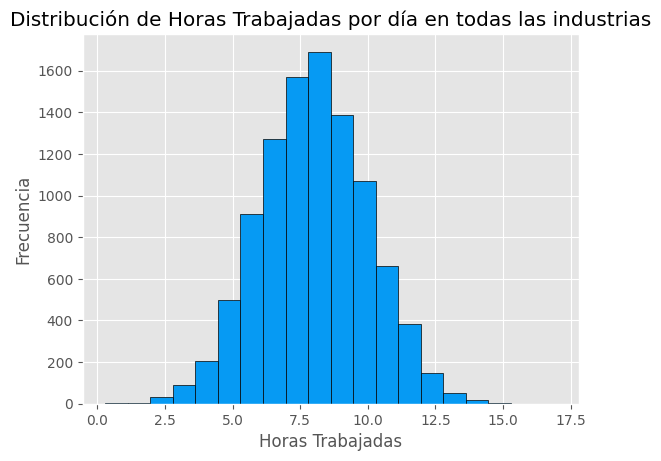

In [8]:
# Histograma de horas trabajadas
plt.hist(df_covid['Hours_Worked_Per_Day'], bins=20, edgecolor='black', color = '#069AF3')
plt.title('Distribución de Horas Trabajadas por día en todas las industrias')
plt.xlabel('Horas Trabajadas')
plt.ylabel('Frecuencia')
plt.show()

Ahora, revisaremos cómo es la distribución para cada industría independientemente.

[Text(0.5, 1.0, 'Horas Trabajadas por día en Retail'),
 Text(0.5, 0, 'Horas de trabajo'),
 Text(0, 0.5, 'Frecuencia')]

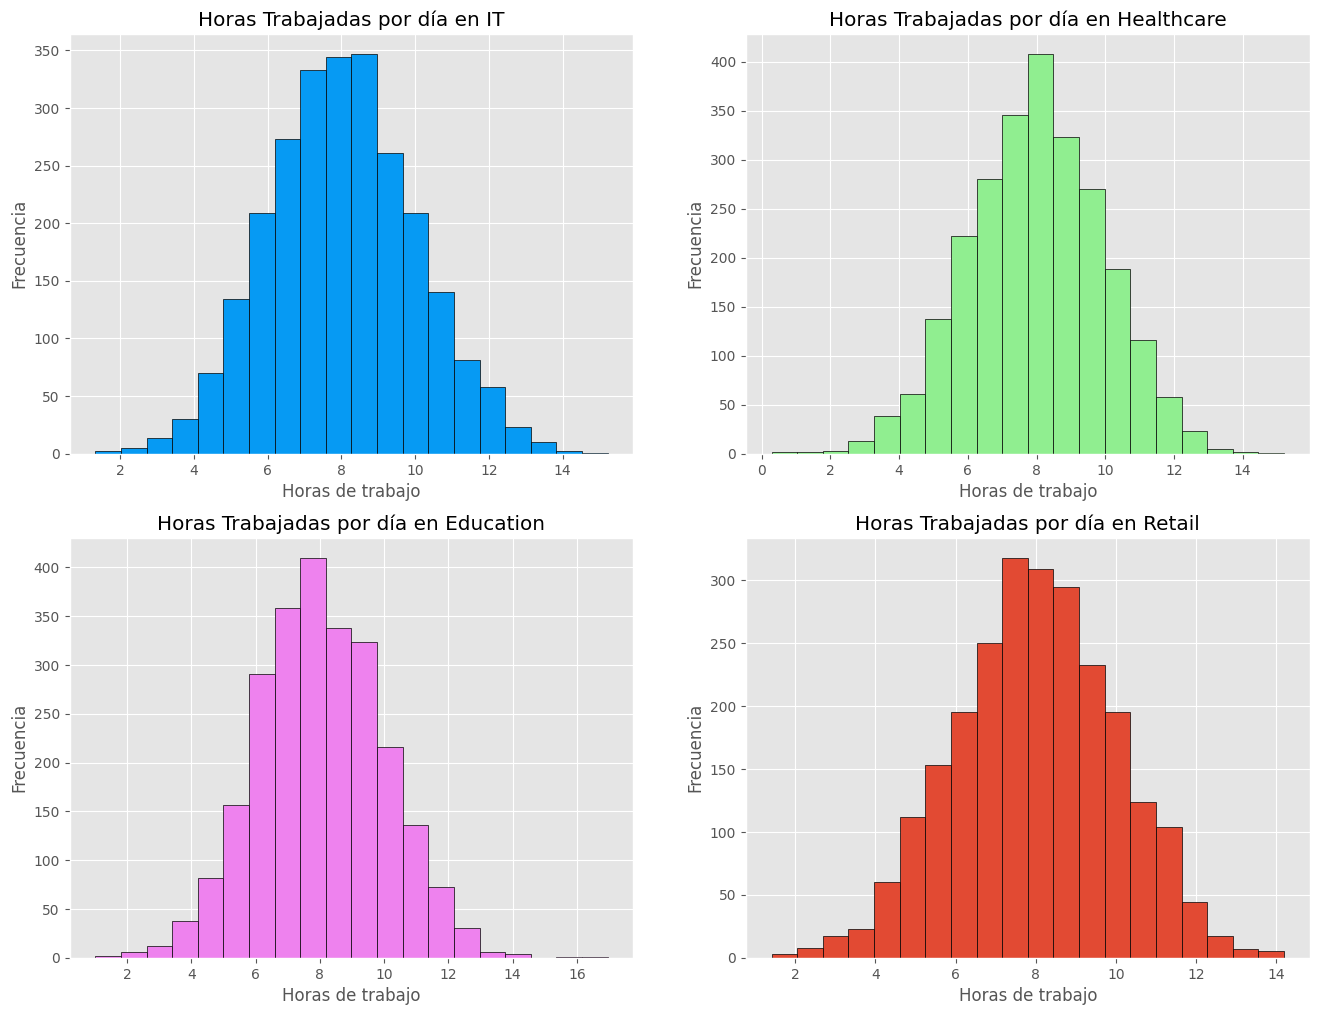

In [9]:
# Agrupación de los registros en cada insdustría: IT, healthcare, Education y Retail
IT = df_covid[df_covid['Sector'] == 'IT']
Hcare = df_covid[df_covid['Sector'] == 'Healthcare']
Edu = df_covid[df_covid['Sector'] == 'Education']
Retail = df_covid[df_covid['Sector'] == 'Retail']

# Crear gráfica y definir tamaño
fig, axs = plt.subplots(2, 2, figsize = (16, 12))

# Industría IT
axs[0, 0].hist(IT['Hours_Worked_Per_Day'], bins = 20, edgecolor = 'black', color = '#069AF3')
axs[0, 0].set(title='Horas Trabajadas por día en IT', 
              xlabel='Horas de trabajo', 
              ylabel='Frecuencia')

# Industría Healthcare
axs[0, 1].hist(Hcare['Hours_Worked_Per_Day'], bins = 20, edgecolor = 'black', color = 'lightgreen')
axs[0, 1].set(title='Horas Trabajadas por día en Healthcare', 
              xlabel='Horas de trabajo', 
              ylabel='Frecuencia')

# Industría Education
axs[1, 0].hist(Edu['Hours_Worked_Per_Day'], bins = 20, edgecolor = 'black', color = 'violet')
axs[1, 0].set(title='Horas Trabajadas por día en Education', 
              xlabel='Horas de trabajo', 
              ylabel='Frecuencia')

# Industría Retail
axs[1, 1].hist(Retail['Hours_Worked_Per_Day'], bins = 20, edgecolor = 'black')
axs[1, 1].set(title='Horas Trabajadas por día en Retail', 
              xlabel='Horas de trabajo', 
              ylabel='Frecuencia')


### Gráficas de Boxplot

A la información agrupada por indusrtía, aplicaremos un diagrama de Boxplot, con el fin de observar cómo están distribuidos los datos.

<Axes: xlabel='Sector', ylabel='Hours_Worked_Per_Day'>

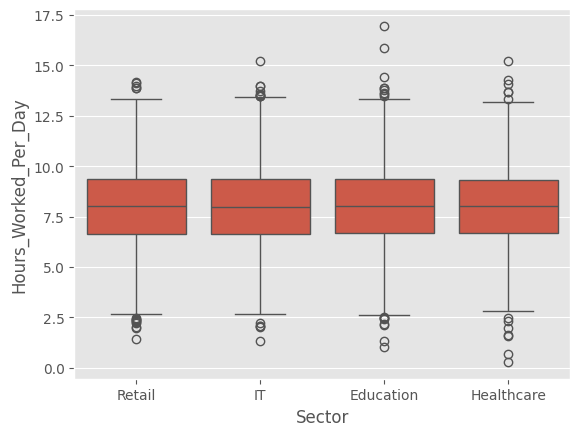

In [ ]:
sns.boxplot(x = df_covid['Sector'], y = df_covid['Hours_Worked_Per_Day'])

Las gráficas muestran algunos outliers. Si pretendemos observar la distribución sin que afecte por los outliers, se procedea realizar las siguiente filtracíon.

In [10]:
# Encontrar los puntos del primer y tercer cuartil
Q1 = df_covid['Hours_Worked_Per_Day'].quantile(0.25)
Q3 = df_covid['Hours_Worked_Per_Day'].quantile(0.75)
IQR = Q3 - Q1 # Intercuartil rango

# Definir límites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# filtrar según los rangos encontrados
df_new = df_covid[(df_covid['Hours_Worked_Per_Day'] >= lower_bound) & (df_covid['Hours_Worked_Per_Day'] <= upper_bound)]

# Comparación entre datos con y sin outliers
print('Datos totales:', df_covid.shape[0])
print('Datos sin outliers:', df_new.shape[0])


Datos totales: 10000
Datos sin outliers: 9941


Graficaremos nuevamente y compararemos los resultados

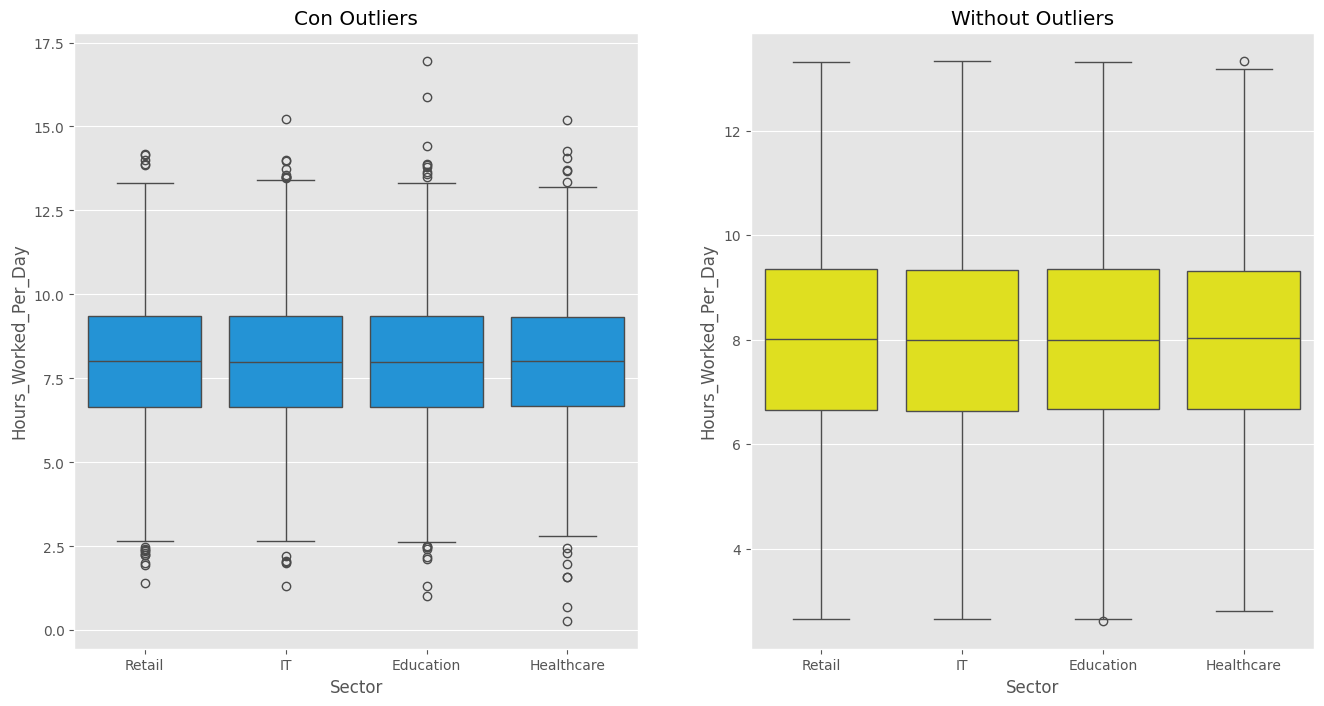

In [11]:
# Crear gráfica y definir tamaño
fig, axs = plt.subplots(1, 2, figsize = (16, 8))

# Con outliers
sns.boxplot(x = df_covid['Sector'], y = df_covid['Hours_Worked_Per_Day'], ax = axs[0], color = '#069AF3')
axs[0].set_title('Con Outliers')

# Sin outliers
sns.boxplot(x = df_new['Sector'], y = df_new['Hours_Worked_Per_Day'], ax = axs[1], color = 'yellow')
axs[1].set_title('Without Outliers')

# Mostrar gráficas
plt.show()

### Diagramas de barras y niveles de estrés

Nos enfocaremos en analizar la variable 'Stress Level' y observaremos como son los niveles de estrés en cada sector. Según el atributo mencionado, tenemos 3 niveles: **Low, Medium, High.** Ahora, agruparemos, los datos por medio de una tabla pivote. Finalmente, graficaremos losvalores correspondientes.

In [12]:
# Agrupamos los datos por medio de una pivot
df_pivot = pd.pivot_table(df_covid, index = 'Stress_Level', columns = 'Sector', aggfunc='size')
df_pivot

Sector,Education,Healthcare,IT,Retail
Stress_Level,,,,
High,741,767,751,777
Low,499,532,500,477
Medium,1244,1199,1295,1218


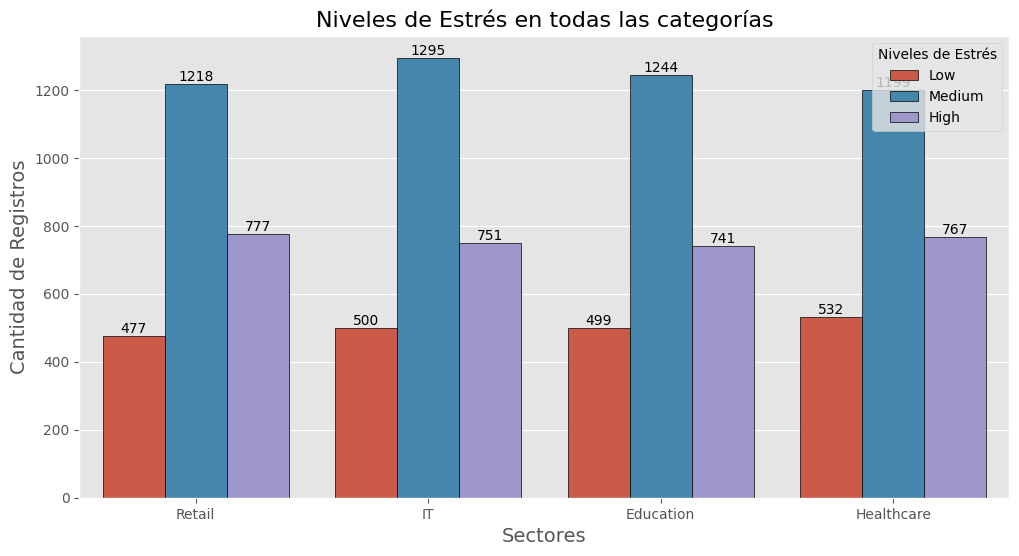

In [13]:
# Crear figura y definir su tamaño
plt.figure(figsize = (12, 6))
ax = sns.countplot(data = df_covid, x = 'Sector', hue = 'Stress_Level', edgecolor = 'black')

# Añadir etiquetas encima de las barras
for container in ax.containers:
    ax.bar_label(container)

ax.set_title('Niveles de Estrés en todas las categorías', fontsize = 16)
ax.set_xlabel('Sectores', fontsize = 14)
ax.set_ylabel('Cantidad de Registros', fontsize = 14)

ax.legend(title='Niveles de Estrés', loc='upper right')

Notamos que los niveles de estrés tienen un comportamiento similar en todas las industrías, donde predomina los niveles medio-altos de estrés. Claramente las condiciones en las que se desarrolló la pandemia afectó significativamente el estado de ánimo para todas las industrias.

### Thank you 


## Author

<a href="https://www.linkedin.com/in/jefferson-esquivel-33a25318a/" target="_blank">Jefferson Esquivel Hincapie</a>

